<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%207/Google%20Colab/Tugas_Lecture_7_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 7 XGBoost pada dataset melb_data.csv

# Menghubungkan GDrive ke GColab

In [1]:
# Import library Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount (pasang) Google Drive pada direktori /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode di atas adalah penggunaan library Google Colab untuk mengakses Google Drive. Pertama, kita mengimpor modul drive dari google.colab. Kemudian, kita melakukan mount Google Drive pada direktori /content/drive menggunakan fungsi drive.mount(). Setelah dieksekusi, kita dapat mengakses file yang ada di Google Drive dari Google Colab.

# Memuat Library

In [26]:
# Import library Pandas dan menggantikan 'pd' sebagai alias untuk penggunaan lebih lanjut
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Kode di atas mengimpor library Pandas dengan alias pd, serta library Seaborn dan Matplotlib. Dengan mengggunakan pd sebagai alias, kita dapat menggunakan fungsi-fungsi dari Pandas dengan penulisan yang lebih singkat dan mudah dibaca. Sedangkan, Seaborn dan Matplotlib digunakan untuk visualisasi data.

# Eksplor Data

In [3]:
#Membaca file CSV yang berisi data ke dalam sebuah DataFrame
data = pd.read_csv('/content/drive/MyDrive/Dataset/melb_data.csv')

In [4]:
#Menampilkan isi dari dataset
data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [5]:
# Ini adalah kode untuk menampilkan informasi tentang objek 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

Kode di atas membaca file CSV yang berisi data ke dalam sebuah DataFrame menggunakan Pandas. Path file CSV tersebut diambil dari Google Drive. Setelah itu, kode menampilkan isi dari dataset dengan memanggil variabel data.

Selanjutnya, data.info() digunakan untuk menampilkan informasi tentang objek DataFrame data, termasuk informasi tentang jumlah baris dan kolom, tipe data setiap kolom, dan jumlah nilai non-null dalam setiap kolom.

# Bersihkan Data

In [6]:
# Menghitung jumlah nilai NaN (Not a Number) pada kolom 'Bedroom2'
nan_count_bedroom2 = data['Bedroom2'].isna().sum()

# Menghitung jumlah nilai NaN pada kolom 'Bathroom'
nan_count_bathroom = data['Bathroom'].isna().sum()

# Menghitung jumlah nilai NaN pada kolom 'Car'
nan_count_car = data['Car'].isna().sum()

# Menampilkan jumlah NaN pada kolom 'Bedroom2' ke layar
print(f"Jumlah NaN pada kolom Bedroom2: {nan_count_bedroom2}")

# Menampilkan jumlah NaN pada kolom 'Bathroom' ke layar
print(f"Jumlah NaN pada kolom Bathroom: {nan_count_bathroom}")

# Menampilkan jumlah NaN pada kolom 'Car' ke layar
print(f"Jumlah NaN pada kolom Car: {nan_count_car}")

Jumlah NaN pada kolom Bedroom2: 3469
Jumlah NaN pada kolom Bathroom: 3471
Jumlah NaN pada kolom Car: 3576


Kode di atas menghitung jumlah nilai NaN (Not a Number) pada kolom 'Bedroom2', 'Bathroom', dan 'Car' dalam DataFrame data.

1. Pada kolom 'Bedroom2', terdapat 3469 nilai NaN.
2. Pada kolom 'Bathroom', terdapat 3471 nilai NaN.
3. Pada kolom 'Car', terdapat 3576 nilai NaN.

Nilai NaN menandakan adanya data yang hilang atau tidak tersedia dalam dataset. Mengetahui jumlah NaN pada setiap kolom penting untuk memahami kualitas dan integritas data serta dapat membantu dalam proses pembersihan data (data cleaning) dan pengambilan keputusan.

In [7]:
# Menghapus baris (data) yang memiliki nilai yang hilang (NaN) dalam kolom 'Car'
data.dropna(subset=['Car'], inplace=True)

In [8]:
# Menghitung jumlah nilai NaN (missing values) dalam kolom 'Car' dari DataFrame 'data'
nan_count_car = data['Car'].isna().sum()

# Menampilkan jumlah nilai NaN dalam kolom 'Car' menggunakan f-string
print(f"Jumlah nilai NaN dalam kolom Car: {nan_count_car}")

Jumlah nilai NaN dalam kolom Car: 0


Kode di atas menghapus baris (data) yang memiliki nilai yang hilang (NaN) dalam kolom 'Car' dari DataFrame data. Setelah penghapusan dilakukan, dilakukan penghitungan ulang jumlah nilai NaN dalam kolom 'Car' untuk memastikan bahwa data telah dibersihkan dari nilai NaN.

Ini menunjukkan bahwa setelah penghapusan, tidak ada lagi nilai NaN dalam kolom 'Car' pada DataFrame data.

# Pre-processing Data

In [9]:
# Mengambil bentuk (shape) dari data
data.shape

(14820, 22)

In [10]:
# Mengubah kolom 'Bedroom2' menjadi tipe data integer
data['Bedroom2'] = data['Bedroom2'].astype(int)

# Mengubah kolom 'Bathroom' menjadi tipe data integer
data['Bathroom'] = data['Bathroom'].astype(int)

# Mengubah kolom 'Car' menjadi tipe data integer
data['Car'] = data['Car'].astype(int)

In [11]:
# Pilih subset dari predictor (variabel independen) yang akan digunakan dalam analisis.
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

# Buat dataframe 'X' yang hanya berisi kolom-kolom yang terdapat dalam 'cols_to_use'.
X = data[cols_to_use]

In [12]:
# Select target
y = data.Price

Kode di atas melakukan beberapa langkah pemrosesan data:

1. Mengambil bentuk (shape) dari data dengan menggunakan data.shape, yang akan memberikan informasi tentang jumlah baris dan kolom dalam DataFrame data.

2. Mengubah tipe data kolom 'Bedroom2', 'Bathroom', dan 'Car' menjadi tipe data integer menggunakan metode astype(int).

3. Memilih subset dari predictor (variabel independen) yang akan digunakan dalam analisis, yang disimpan dalam variabel cols_to_use.

4. Membuat DataFrame X yang hanya berisi kolom-kolom yang terdapat dalam cols_to_use.

5. Memilih target variabel (variabel dependen) yang akan diprediksi, disimpan dalam variabel y.

Dengan langkah-langkah tersebut, kita telah mempersiapkan data untuk dilakukan analisis lebih lanjut menggunakan variabel independen yang telah dipilih (X) dan target variabel (y).

# Visualisasi Data

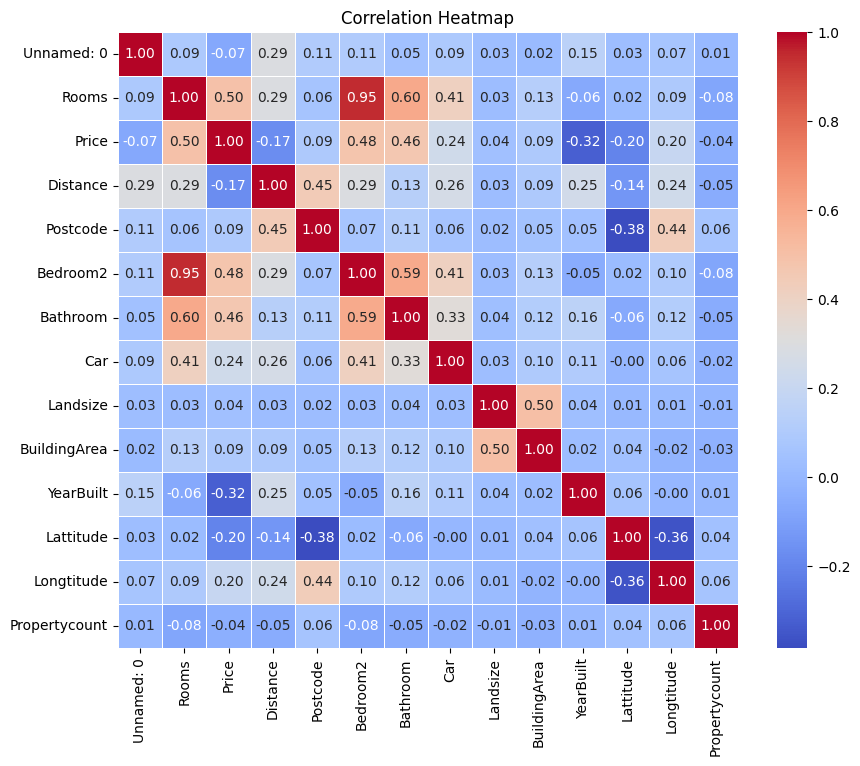

In [27]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation coefficients
correlation_matrix = numeric_data.corr()

# Display Pearson correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Kode ini melakukan hal yang serupa dengan kode sebelumnya, yaitu menghasilkan heatmap yang menampilkan koefisien korelasi Pearson antar kolom numerik dalam DataFrame data. Langkah-langkahnya adalah:

1. Filter kolom numerik: Kolom-kolom numerik dari DataFrame data difilter menggunakan select_dtypes(include=['float64', 'int64']), menghasilkan DataFrame baru yang hanya berisi kolom-kolom dengan tipe data numerik.

2. Hitung koefisien korelasi Pearson: Menghitung koefisien korelasi Pearson antar kolom-kolom numerik yang dipilih dengan corr(), dan menyimpan hasilnya dalam correlation_matrix.

3. Visualisasi dengan heatmap: Membuat heatmap dari matriks korelasi Pearson menggunakan Seaborn. Heatmap ditampilkan dalam ukuran 10x8 inch, dengan nilai korelasi diannotasikan di dalam sel (annot=True). Colormap 'coolwarm' digunakan untuk menunjukkan nilai korelasi, dan nilai-nilai korelasi diformat menjadi dua angka desimal (fmt=".2f"). Lebar garis antar sel dalam heatmap disetel menjadi 0.5 piksel (linewidths=0.5). Terakhir, ditambahkan judul 'Correlation Heatmap' menggunakan plt.title().

Visualisasi heatmap ini berguna untuk melihat hubungan korelasi antar kolom numerik dalam dataset data.

# Latih dan Evaluasi Data

In [13]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi set pelatihan dan validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.3)

In [14]:
# Import library XGBRegressor dari XGBoost
from xgboost import XGBRegressor

# Membuat objek model XGBoost
my_model = XGBRegressor()

# Melatih model dengan data pelatihan X_train dan target y_train
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Kode di atas melakukan beberapa hal terkait pemodelan:

1. Memisahkan Data: Menggunakan train_test_split dari scikit-learn untuk membagi data menjadi set pelatihan (X_train, y_train) dan set validasi (X_valid, y_valid). Set pelatihan digunakan untuk melatih model, sedangkan set validasi digunakan untuk menguji kinerja model.

2. Mengimpor XGBRegressor: Mengimpor kelas XGBRegressor dari pustaka XGBoost. Ini akan digunakan untuk membuat objek model.

3. Membuat Objek Model: Membuat objek model XGBoost menggunakan XGBRegressor().

4. Pelatihan Model: Melatih model XGBoost menggunakan metode fit(). Model dilatih menggunakan data pelatihan X_train dan target y_train.

Setelah tahap ini, model XGBoost telah dilatih dengan data pelatihan dan siap untuk dievaluasi menggunakan data validasi.

In [15]:
# Mengimpor modul mean_absolute_error dari sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Melakukan prediksi menggunakan model (my_model) pada data validasi (X_valid)
predictions = my_model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) antara prediksi dan nilai target aktual (y_valid)
# dan mencetak hasilnya
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 239917.9230611083


Kode di atas melakukan evaluasi model XGBoost yang telah dilatih dengan menggunakan data validasi. Langkah-langkahnya adalah sebagai berikut:

1. Mengimpor mean_absolute_error: Mengimpor modul mean_absolute_error dari sklearn.metrics. Modul ini akan digunakan untuk menghitung Mean Absolute Error (MAE) antara prediksi dan nilai target aktual.

2. Melakukan Prediksi: Menggunakan model (my_model) yang telah dilatih untuk melakukan prediksi pada data validasi (X_valid) menggunakan metode predict().

3. Menghitung MAE: Menghitung MAE antara prediksi dan nilai target aktual (y_valid) menggunakan mean_absolute_error().

4. Mencetak Hasil: Hasil MAE dicetak ke layar menggunakan print().

Hasil Mean Absolute Error (MAE) yang diperoleh adalah sekitar 239,917.92. MAE mengindikasikan rata-rata kesalahan absolut antara prediksi dan nilai target aktual pada data validasi. Dalam konteks ini, MAE sebesar 239,917.92 menunjukkan rata-rata kesalahan prediksi harga properti. Semakin rendah nilai MAE, semakin baik kinerja model dalam melakukan prediksi.

In [16]:
# Membuat model XGBoost Regressor dengan 500 pohon keputusan (n_estimators=500)
my_model_0 = XGBRegressor(n_estimators=500)

# Melatih model menggunakan data pelatihan X_train dan label y_train
my_model_0.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Kode di atas membuat model XGBoost Regressor dengan 500 pohon keputusan (n_estimators=500) dan melatih model menggunakan data pelatihan X_train dan label y_train. Dengan menambahkan lebih banyak pohon keputusan, model memiliki lebih banyak kapasitas untuk mempelajari pola yang kompleks dalam data pelatihan. Namun, perlu diingat bahwa peningkatan jumlah pohon keputusan juga dapat meningkatkan waktu pelatihan dan kompleksitas model.

In [17]:
# Melakukan prediksi menggunakan model 'my_model_0' pada data validasi 'X_valid'
predictions_0 = my_model_0.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) antara prediksi dan target sebenarnya 'y_valid'
mae = mean_absolute_error(predictions_0, y_valid)

# Menampilkan MAE ke layar
print("Mean Absolute Error: " + str(mae))

Mean Absolute Error: 252962.14232596717


Hasil Mean Absolute Error (MAE) yang diperoleh dengan menggunakan model XGBoost Regressor yang memiliki 500 pohon keputusan adalah sekitar 252,962.14. Ini menunjukkan rata-rata kesalahan absolut antara prediksi dan nilai target aktual pada data validasi. Semakin rendah nilai MAE, semakin baik kinerja model dalam melakukan prediksi. Dalam kasus ini, MAE sedikit lebih tinggi dibandingkan dengan model sebelumnya yang menggunakan 100 pohon keputusan.

In [18]:
from sklearn.model_selection import GridSearchCV

# Tentukan model XGBoost
model_grid = XGBRegressor()

# Tentukan parameter grid
param_grid = {
    'n_estimators': [150, 200, 250, 300, 1000]  # Ganti dengan rentang nilai yang ingin Anda coba
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Lakukan fitting menggunakan data training
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_n_estimators = grid_search.best_params_['n_estimators']

print("Nilai n_estimators terbaik:", best_n_estimators)
# Tentukan range nilai n_estimators yang akan diuji
n_estimators_list = [100, 150, 200, 250, 300]

# Inisialisasi sebuah list untuk menyimpan hasil MAE
mae_results = []

# Loop melalui setiap nilai n_estimators
for n_estimators in n_estimators_list:
    # Inisialisasi model dengan n_estimators tertentu
    model_grid = XGBRegressor(n_estimators=n_estimators)

    # Fitting model menggunakan data training
    model_grid.fit(X_train, y_train)

    # Lakukan prediksi pada data validasi
    predictions = model_grid.predict(X_valid)

    # Hitung Mean Absolute Error
    mae = mean_absolute_error(predictions, y_valid)

    # Tampilkan nilai n_estimators dan MAE
    print(f"n_estimators: {n_estimators}, Mean Absolute Error: {mae}")

    # Tambahkan nilai MAE ke dalam list
    mae_results.append(mae)

Nilai n_estimators terbaik: 150
n_estimators: 100, Mean Absolute Error: 239917.9230611083
n_estimators: 150, Mean Absolute Error: 241135.79867261302
n_estimators: 200, Mean Absolute Error: 244287.76643155364
n_estimators: 250, Mean Absolute Error: 245677.70205398815
n_estimators: 300, Mean Absolute Error: 247880.2081312556


Kode di atas menggunakan GridSearchCV dari scikit-learn untuk mencari parameter terbaik pada model XGBoost. Parameter yang diuji adalah 'n_estimators', dan hasilnya akan dibandingkan dengan pengujian manual dengan beberapa nilai 'n_estimators' yang telah ditentukan sebelumnya.

In [19]:
# Membuat model XGBoost Regressor dengan 100 pohon keputusan (n_estimators=100)
my_model_2 = XGBRegressor(n_estimators=100)

# Melatih model menggunakan data pelatihan (X_train, y_train) dengan early stopping
# untuk menghentikan pelatihan jika tidak ada perbaikan dalam 5 iterasi
# dan menggunakan data validasi (X_valid, y_valid) untuk evaluasi
my_model_2.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)

# Melakukan prediksi pada data validasi menggunakan model yang telah dilatih
predictions_2 = my_model_2.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) antara prediksi dan nilai sebenarnya pada data validasi
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_2, y_valid)))

Mean Absolute Error: 241970.1536651625


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Kode di atas adalah contoh penggunaan model XGBoost Regressor untuk melakukan prediksi pada data validasi dan mengukur kinerja model menggunakan metrik Mean Absolute Error (MAE). Berikut penjelasan dari setiap langkah dalam kode tersebut:

1. Membuat model XGBoost Regressor dengan 100 pohon keputusan (n_estimators=100). Model ini akan digunakan untuk melakukan prediksi pada data.

2. Melatih model menggunakan data pelatihan (X_train, y_train) dengan parameter tambahan early_stopping_rounds=5. Ini mengindikasikan bahwa pelatihan model akan berhenti jika tidak ada perbaikan dalam nilai evaluasi pada data validasi selama 5 iterasi. Data validasi digunakan untuk mengevaluasi kinerja model selama pelatihan.

3. Melakukan prediksi pada data validasi (X_valid) menggunakan model yang telah dilatih. Hasil prediksi disimpan dalam variabel predictions_2.

4. Menghitung Mean Absolute Error (MAE) antara hasil prediksi (predictions_2) dan nilai sebenarnya (y_valid) pada data validasi. MAE adalah metrik yang mengukur sejauh mana prediksi model dari nilai sebenarnya dalam satuan absolut. Hasil MAE dicetak ke layar sebagai keluaran.

Selain itu, pesan peringatan dalam output yang mengatakan "early_stopping_rounds" dalam metode "fit" sudah tidak direkomendasikan dan harus digunakan dalam konstruktor atau "set_params" adalah peringatan yang menginformasikan bahwa penggunaan parameter early_stopping_rounds dalam metode fit di XGBoost sudah tidak disarankan dan seharusnya digunakan dalam konstruktor atau set_params untuk lebih baik kompatibilitas dengan scikit-learn.

In [20]:
# Import library XGBRegressor untuk mengembangkan model XGBoost
my_model_1 = XGBRegressor(n_estimators=100)

# Melatih model menggunakan data pelatihan
my_model_1.fit(X_train, y_train)

# Membuat prediksi menggunakan model yang telah dilatih pada data validasi
predictions_1 = my_model_1.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error (MAE) dari prediksi model
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_1, y_valid)))

Mean Absolute Error: 239917.9230611083


Kode di atas adalah contoh penggunaan library XGBoost untuk mengembangkan model regresi dengan XGBRegressor. Berikut adalah penjelasan langkah-langkahnya:

1. Pertama-tama, library XGBRegressor diimpor ke dalam program. Ini adalah library yang digunakan untuk mengembangkan model regresi dengan algoritma XGBoost.

2. Model regresi XGBoost didefinisikan dengan menggunakan XGBRegressor(n_estimators=100). n_estimators adalah parameter yang menentukan jumlah pohon keputusan yang akan digunakan dalam model. Dalam kasus ini, model akan terdiri dari 100 pohon keputusan.

3. Selanjutnya, model tersebut dilatih dengan menggunakan data pelatihan. Data pelatihan diberikan dalam bentuk X_train (fitur) dan y_train (label/target).

4. Setelah model dilatih, digunakan untuk membuat prediksi pada data validasi (X_valid).

5. Mean Absolute Error (MAE) dihitung dengan membandingkan prediksi yang dihasilkan oleh model (predictions_1) dengan data validasi (y_valid). MAE adalah metrik evaluasi yang mengukur seberapa dekat prediksi model dengan nilai sebenarnya. Semakin rendah MAE, semakin baik kualitas model regresi.

6. Hasil MAE dicetak ke layar untuk memberikan informasi tentang sejauh mana model dapat memprediksi data validasi dengan akurasi.

Hasil keluaran dari kode di atas adalah nilai MAE yang mengindikasikan tingkat kesalahan prediksi model terhadap data validasi. Dalam contoh ini, MAE memiliki nilai sekitar 239917.9230611083, yang menunjukkan sejauh mana model dapat memprediksi data validasi dengan rata-rata kesalahan sekitar 239917.9230611083 unit. Semakin rendah nilai MAE, semakin baik kinerja model dalam memprediksi data.

In [21]:
# Membuat model XGBoost Regressor dengan 100 pohon keputusan (n_estimators=100).
# Model ini akan digunakan untuk memprediksi variabel target berdasarkan fitur-fitur dalam dataset.
my_model_3 = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=6)

# Melatih model dengan menggunakan data pelatihan (X_train) dan target (y_train).
my_model_3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=6,
             num_parallel_tree=None, random_state=None, ...)

Kode di atas menciptakan sebuah model regresi menggunakan algoritma XGBoost dengan 100 pohon keputusan (n_estimators=100) yang akan digunakan untuk memprediksi variabel target berdasarkan fitur-fitur dalam dataset. Model ini ditentukan dengan konfigurasi berikut:

1. XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=6): Model XGBoost Regressor dibuat dengan beberapa parameter konfigurasi, termasuk:

  - n_estimators=100: Model ini akan terdiri dari 100 pohon keputusan yang akan digunakan dalam proses prediksi.
  - learning_rate=0.05: Tingkat pembelajaran yang digunakan dalam algoritma XGBoost. Ini mengontrol sejauh mana setiap pohon keputusan memperbarui prediksi model sebelumnya.
  - n_jobs=6: Jumlah pekerjaan paralel yang akan digunakan dalam pelatihan model. Dalam hal ini, 6 pekerjaan akan digunakan untuk melatih model.

2. my_model_3.fit(X_train, y_train): Model XGBoost ini dilatih menggunakan data pelatihan yang diberikan dalam X_train dan target yang diberikan dalam y_train. Proses pelatihan ini akan menghasilkan model yang dapat digunakan untuk membuat prediksi berdasarkan data yang tidak terlihat sebelumnya.

Selain parameter-parameter yang disebutkan di atas, terdapat juga parameter lain yang bisa dikustomisasi dalam model XGBoost, seperti max_depth, gamma, colsample_bytree, dan banyak lagi. Model ini diarahkan untuk melakukan regresi, yaitu memprediksi nilai berkelanjutan, dan akan mencoba memahami pola dalam data pelatihan untuk melakukan prediksi yang akurat terhadap target yang diberikan.

In [22]:
# predictions_3 adalah prediksi yang dihasilkan oleh model (my_model_3) terhadap data validasi (X_valid).
predictions_3 = my_model_3.predict(X_valid)

# mean_absolute_error adalah fungsi untuk menghitung Mean Absolute Error (MAE) antara prediksi (predictions_3) dan nilai sebenarnya (y_valid).
# Hasil MAE ini mengukur sejauh mana prediksi model berbeda dari nilai sebenarnya dalam skala absolut.
# Hasil MAE kemudian dicetak sebagai teks.
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_3, y_valid)))

Mean Absolute Error: 253334.320463619


Kode di atas digunakan untuk menghitung Mean Absolute Error (MAE) antara prediksi yang dihasilkan oleh model (my_model_3) terhadap data validasi (X_valid) dan nilai sebenarnya (y_valid). Hasil MAE ini mengukur sejauh mana prediksi model berbeda dari nilai sebenarnya dalam skala absolut. Hasil MAE kemudian dicetak sebagai teks, yang dalam contoh ini adalah sekitar 253334.320463619.